# Исследование объявлений о продаже квартир

Нам предстоит работать с архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
    
*Целью* исследования является определение рыночной стоимости объектов недвижимости.
    
*В ходе исследования мы*
1. проведем анализ данных,
2. установим параметры, влияющие на цену объектов.

*Результат исследования* позволит построить превентивную автоматизированную систему безопасности.
    
*Этапы работы*: 
1. Сбор данных - выгрузим необходимые библиотеки данных по работе с данными и их визуализацией и изучим общую информацию об архиве объявлений;
2. Предобработка данных - проведем подготовку выгруженных данных, проверим их тип, наличие пропущенных значений и выбросов, продублированных строк;
3. Анализ - на основе уже обработанных данных проведем статистические рассчеты и подготовим заключения о факторах, влияющих на цену объекта.
4. Сформулировать общий вывод и описать полученные результаты проведенного исследования.

</div>

### Откройте файл с данными и изучите общую информацию

1) Загрузили данные из csv-файла в датафрейм c помощью библиотеки pandas. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Откроем файл. Вся информация в строках соединилась, даже в названиях столбцов. 

In [2]:
#data = pd.read_csv('/datasets/real_estate_data.csv') 
#print(data.head(20))

#Будем решать вопрос слипшихся строк с помощью разделителя \t.

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 

Теперь таблица выглядит приемлимо для просмотра. Откроем первые 10 строк для первичного ознакомления с данными.

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


2) Чтобы открыть общую информацию о полученном датафрейме воспользуемся методом info(). 

Мы видим, что в таблице 22 столбца и во многих их них есть пропуски. Также в инструкции к работе обозначен булев тип в столбце is_apartment, а у нас object. Нужно это запомнить. Также посмотреть количество строк и столбцов можно с помощью команды data.shape.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

3) Построили гистограммы для всех числовых столбцов таблицы на одном графике с помощью команды hist().

Поскольку у нас 17 столбцов с числовым значением, по ним мы получили 17 гистограмм. Не будем забывать о том, что это лишь предварительная визуализация, и, по мере исследования данных, она поменяется. 

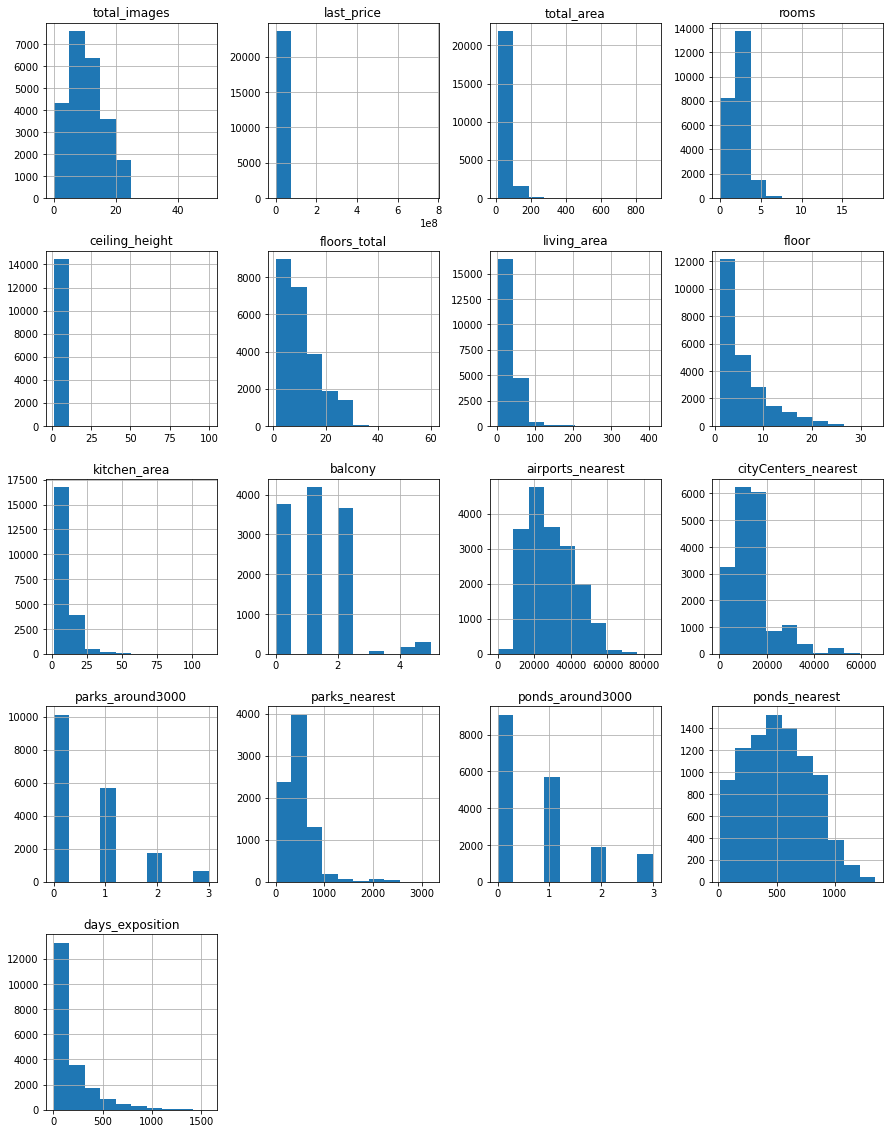

In [5]:
data.hist(figsize=(15, 20));
plt.show()

На данный момент мы можем увидеть, что у большинства объявлений:

- отсуствуют парки и пруды, а если они и есть, то в среднем до них 500 м,
- срок размещения менее полугода,
- площадь кухонь менее 12,5 м,
- либо нет балконов, либо их количество 1-2,
- до ближайшего аэропорта 20-25 км,
- до центра города 10-15 км,
- высоту потолка пока оценить трудно, значения неправдоподобны :)
- дома в среднем по 5-10 этажей,
- жилая площадь примерно 50 кв.м,
- квартиры находятся на 1-5 этажах,
- в объявлениях размещено 10-15 фотографий,
- это 1-3 комнатные квартиры,
- площадь квартир до 100 кв.м.
    
Что касается качества исходного массива данных:
- для открытия файла потребовался разделитель \t,
- пропущенные значения (только 8 столбцов из 22 полностью заполнены), 
- тип данных в некоторых столбцах не соответствует содержимому (дата и и время зписаны как строки, а этажи не в целых числах).

### Выполните предобработку данных

***1) Пропущенные значения в столбцах*** 

**Столбцы**

Строк в таблице должно быть 23699, однако в некоторых столбцах видны пропуски. 
- ceiling_height - высота потолков (м), 
- floors_total - этажей в доме, 
- living_area — жилая площадь в квадратных метрах (м²),
- is_apartment — апартаменты,
- kitchen_area — площадь кухни в квадратных метрах (м²),
- locality_name — название населённого пункта,
- balcony — число балконов,
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м),
- cityCenters_nearest — расстояние до центра города (м),
- parks_around3000 — число парков в радиусе 3 км,
- parks_nearest - расстояние до ближайшего парка (м),
- ponds_around3000 — число водоёмов в радиусе 3 км,
- ponds_nearest — расстояние до ближайшего водоёма (м),
- days_exposition — сколько дней было размещено объявление (от публикации до снятия).

Первым делом с помощью комбинации методов isna() и sum() посмотрим, количество пропущенных значений в этих столбцах.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 Оценим процентное соотношение пропущенных значений к общему числу строк. Благодаря цветному оформлению сразу видны столбцы с максимальным количеством пропущенных значений - is_apartment (88%), parks_nearest (66%), ponds_nearest (62%), balcony (49%), ceiling_height (39%).

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Заполнение пропущенных значений**

Некоторые пропуски мы будем заполнять значениями, поскольку они важны для целей исследования.

- ***Столбец balcony***

Можно начать работать со столбцом с балконами - если продавец не указал число балконов, то, скорее всего, в его квартире их нет.

С помощью метода .isna().sum() посмотрим количество пропусков в столбце с балконами. 

In [8]:
data['balcony'].isna().sum()
# Пропусков оказалось 11519, почти 50% от всех строк, удалять не будем, лучше заполнить.

11519

Почти 50% от всех строк пропущено, это слишком много, чтобы удалять их. Поэтому заполним их значением 0 методом .fillna(0).

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()
# Снова посмотрим количество пропусков - 0.

0

- ***Столбец is_apartment***

В данном столбце пропущено 20924 строк от общего числа. Но для исследований стоимости данный столбец не потребуется, поэтому его можно оставить незаполненным, либо удалить методом .dropna().
Также можно предположить, что если есть пропуск, значит это не апартаменты.
По такой логике заполним столбец значением False.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- ***Столбцы locality_name и floors_total***

У нас много столбцов, в которых нельзя заполнить пропущенные значения, например, название населенного пункта locality_name, их в нем 49. Это менее 1% общих данных. В столбце floors_total указано, что пропущено 86 строк, это менее 1% от всех данных, эти строки можно удалить. Мы можем удалить строки floors_total и locality_name методом df.dropna().

In [11]:
data.dropna(subset = ['locality_name'], inplace = True)
data.dropna(subset = ['floors_total'], inplace = True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Расстояния до центра города, аэропорта, прудов и парков - это те данные, которые должны были быть внесены с помощью геосервисов. К тому же, слишком много пропущенных значений в этих строках, но позднее все эти столбцы нам понадобятся для исследований.

In [12]:
# На данный момент оставим пропуски.

**Причины появления пропусков**

Данные в столбцах airports_nearest, parks_nearest, ponds_nearest, cityCenters_nearest автоматически получены из геосервисов. ponds_around3000 и parks_around3000 также заполнялись без участия пользователя. Вполне возможно, что во время заполнения случился технический сбой и часть данных была не сохранена. Есть вероятность, что проблема могла быть и на стороннем сервисе.
Остальные столбцы заполнялись пользователями. Тут уже повлиял человеческий фактор: 
- забыл/не знает площадь квартиры или кухни, высоту потолков, сколько этажей в доме, в котором он живет,
- не знает разницу между апартаментами и квартирой, 
- подумал, что если нет балкона, можно и не указывать ничего,
- решил пропустить по причине того, что окно заполнения необязательное,
- обычная невнимательность.

Также некоторые из этих причин могли повлиять на появление не только пропусков, но и аномальных значений.

***2) Типы данных в каждом столбце***

**Cтолбцы, в которых нужно изменить тип данных**

Снова посмотрим тип данных в каждом столбце с помощью метода .info(). 
Мы можем изменить тип данных в таких столбцах, как:
- **first_day_exposition** дата публикации (с object на datetime64)
- **floors_total** количество этажей представлено (с float64 на int64)
- **is_apartment** апартаменты (мы уже поменяли тип данных float на bool в этом столбце, когда заполняли пропущенные значения)
- **balcony** количество балконов представлено (с float64 на int64)

In [13]:
data.info()
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- ***Столбец first_day_exposition***

Методом to_datetime() превратим строковое содержимое этого столбца в даты.

In [14]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format ='%Y-%m-%d %H:%M'
)
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

- ***Столбец floors_total***

Воспользуемся методом .astype('int64'), чтобы преобразовать вещественное число в целое.

In [15]:
data['floors_total'] = data['floors_total'].astype('int64')
data['floors_total'].head(10) 

0    16
1    11
2     5
3    14
4    14
5    12
6    26
7    24
8    27
9     9
Name: floors_total, dtype: int64

- ***Столбец balcony***

Воспользуемся методом .astype('int64'), чтобы преобразовать вещественное число в целое.

In [16]:
data['balcony'] = data['balcony'].astype('int64')
data['balcony'].head(10) 

0    0
1    2
2    0
3    0
4    0
5    0
6    1
7    2
8    0
9    2
Name: balcony, dtype: int64

**Почему нужно изменить тип данных?**

Вычисления и операции зависят от определенного типа данных. Если мы захотим совершить определенное вычисление, не соответствующее типу данных, возникнет ошибка. Сложение строкового типа данных в столбце с locality_name приводит к слитному массиву. Или при просмотре таблицы, в столбце first_day_exposition мы увидим смешанный и визуально не понятный набор цифр без разделителя, пока не приведем в нужный datetime64. Например, у нас есть в таблице столбец floor, в котором этажи записаны целыми числами (1, 9, 16 и т.д.), не идущий ни на какие сравнения со столбцом floors_total, в котором этажи записаны в виде вещественных чисел (1.0, 9.0, 16.0 и т. д.).

***3) Уникальные значения и дубликаты***

Теперь найдем все уникальные значения в столбце locality_name и устраним неявные дубликаты

Найти дупликаты можно с помощью команды .unique(). При просмотре этого списка можно выявить, что одно и тоже название населенного пункта может быть записано по-разному, например, 'городской посёлок Янино-1' и 'городской поселок Янино-1', 'коттеджный поселок Лесное' и 'поселок Лесное'.

In [17]:
#data['locality_name'].unique()

Допустим, что всевозможные вариации словосочетаний с 'поселок' можно заменить на просто 'поселок'. Теперь у нас получился перечень уникальных названий, но все они приведены к единому виду. 

In [18]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['посёлок', 
              'посёлок при железнодорожной станции', 'поселок при железнодорожной станции', 
              'поселок городского типа', 'посёлок городского типа', 
              'городской посёлок', 'городской поселок', 
              'коттеджный поселок', 'коттеджный посёлок', 
              'поселок станции', 'посёлок станции'], 'поселок', regex=True)
)
# оказалось, что в списке есть 'поселок Мурино' и 'Мурино' и 'деревня Кудрово' и 'Кудрово'. Заменим поселок и деревню на город.
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар'
 'Колпино' 'поселок Красный Бор' 'Гатчина' 'деревня Федоровское' 'Выборг'
 'Кронштадт' 'Кировск' 'деревня Новое Девяткино' 'поселок Металлострой'
 'поселок Лебяжье' 'поселок Сиверский' 'поселок Молодцово'
 'поселок Кузьмоловский' 'садовое товарищество Новая Ропша' 'Павловск'
 'деревня Пикколово' 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск'
 'Сестрорецк' 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино' 'поселок Романовка'
 'поселок Бугры' 'поселок Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное'
 'село Павлово' 'поселок 

Для поиска явных дупликатов создадим новую столбец new_locality_name в который поместим данные столбца locality_name, но переведем все значения строк в нижний регистр. Так мы исключим возможность появления одних и тех же наименований населенных пунктов, но написанных разным регистром, например, 'Санкт-Петербург' и 'Санкт-петербург'. 
    
Новый столбец мы создали на тот случай,что если явных дубликатов не будет, то мы продолжим пользоваться в исследовании столбцом locality_name с написанием населенных пунктов с заглавной буквы. После того, как мы проверим наличие явных дупликатов методом .duplicated().sum(), всегда можно удалить столбец new_locality_name или оставить и забыть о его существовании :)

In [19]:
data['new_locality_name'] = data['locality_name'].str.lower()

In [20]:
data.duplicated().sum()

0

Таким образом, мы выяснили, что в таблице: 

- не наблюдалось явных дупликатов объявлений по населенным пунктам,
- часто встречались неявные дупликаты. 
    
Большое количество по-разному записанных населенных пунктов (в основном, появление этих дупликатов было связано с написанием одного и того же слова через букву 'е/ё', а также добавлением к нему различных описаний '... городского типа', 'коттеджный ...'). Для того, чтобы привести этот столбец к единообразном строкам, мы заменили все эти дупликаты близким по значению словом 'поселок'.

### Добавьте в таблицу новые столбцы

Нам нужно добавить в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

- **Цена одного квадратного метра** 

Для заполнения нового столбца воспользуемся формулой рассчета: поделим стоимость объекта на его общую площадь, а затем округлим до двух знаков после запятой. Округлим методом round() с параметром 2.

In [21]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = round(data['price_per_meter'], 2)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург,120370.37
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок шушары,82920.79
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург,92785.71
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург,100000.00
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,поселок янино-1,95065.79
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,поселок парголово,99195.71
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,санкт-петербург,110544.69
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,мурино,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,санкт-петербург,88524.59


- **День недели публикации объявления** 

Оформим в столбце данные так, что если дата была понедельником, то значение будет 0, вторником - 1 и так далее. Воспользуемся методом dt.weekday. Проверим, выведя на экран 10 первых строк по двум нужным нам столбцам.

In [22]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday
display(data[['first_day_exposition', 'day_of_week_exposition']].head(10))

,first_day_exposition,day_of_week_exposition
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1
5,2018-09-10,0
6,2017-11-02,3
7,2019-04-18,3
8,2018-05-23,2
9,2017-02-26,6


- **Месяц публикации объявления**
    
Воспользуемся методом .astype('datetime64[M]'). Проверим, выведя на экран 10 первых строк по двум нужным нам столбцам. В таблице находятся объявления за разные годы, поэтому нам нужно выделить месяц каждого года.

In [23]:
data['month_exposition'] = data['first_day_exposition'].astype('datetime64[M]')
display(data[['first_day_exposition', 'month_exposition']].head(10))

,first_day_exposition,month_exposition
0,2019-03-07,2019-03-01
1,2018-12-04,2018-12-01
2,2015-08-20,2015-08-01
3,2015-07-24,2015-07-01
4,2018-06-19,2018-06-01
5,2018-09-10,2018-09-01
6,2017-11-02,2017-11-01
7,2019-04-18,2019-04-01
8,2018-05-23,2018-05-01
9,2017-02-26,2017-02-01


- **Год публикации объявления**

Воспользуемся методом dt.year. Проверим, выведя на экран 10 первых строк по двум нужным нам столбцам. 

In [24]:
data['year_exposition'] = data['first_day_exposition'].dt.year
display(data[['first_day_exposition', 'year_exposition']].head(10))

,first_day_exposition,year_exposition
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2015-07-24,2015
4,2018-06-19,2018
5,2018-09-10,2018
6,2017-11-02,2017
7,2019-04-18,2019
8,2018-05-23,2018
9,2017-02-26,2017


- **Тип этажа квартиры (значения — «первый», «последний», «другой»)**

У нас есть столбец floor, в которм обозначен этаж, чтобы узнать, является ли квартира из объявления на последнем или другом этаже, необходимо узнать вообще количество этажей - столбец floors_total. До этого мы удалили из него строки с неизвестными данными. Нам понадобится функция, в которой мы опишем механизм сравнения номера этажа квартиры и количество этажей в доме, если этаж 1 - 'первый', если номер этажа равен значению количества этажей в доме - 'последний', все остальные этажи в новом столбце будут обозначены как 'другой'.
Проверим результат, выведем на экран первые 15 строк таблицы, но укажем только иyтересующие нас столбцы.

In [25]:
def class_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data.apply(class_floor, axis = 1)
display(data[['floor', 'floors_total', 'type_floor']].head(15))

,floor,floors_total,type_floor
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


Проверим уникальные значения в новом столбце, вызвав метод .unique(). Видим, что в столбце появились только те значения, которые мы вводили функцией.

In [26]:
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

- **Расстояние до центра города в километрах** 

В новом столбце нам потребуется перевести значения столбца cityCenters_nearest из м в км, а также округлить до ближайших целых значений.

Для этого мы поделим значения из столбца cityCenters_nearest на 1000 и затем воспользуемся функцией round(), если дробная часть меньше 0,5, то округлится в меньшую сторону, если дробная часть больше 0,5 - в большую сторону. Проверим, выведя на экран 10 первых строк по двум нужным нам столбцам. 

In [27]:
data['km_cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['km_cityCenters_nearest'] = round(data['km_cityCenters_nearest'])
display(data[['cityCenters_nearest', 'km_cityCenters_nearest']].head(10))

,cityCenters_nearest,km_cityCenters_nearest
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0
5,NaN,NaN
6,19143.0,19.0
7,11634.0,12.0
8,NaN,NaN
9,15008.0,15.0


Таким образом, мы внесли в таблицу новые столбцы с указанием:
- цены 1 кв м (поделили цену на общую площадь квартиры и округлили до 2х знаков после запятой), 
- дня, месяца и года публикации, выделенными из столбца с датой,
- тип этажа квартиры ('первый', 'последний', 'другой'),
- расстояние до центра города в километрах (для прервода в км поделили данные из столбца на 1000 и округлили).  

### Проведите исследовательский анализ данных

Ранее в некоторых столбцах мы встретили аномальные значения. Для работы с очищенными данными необходимо либо удалить очевидно выбивающиеся значения, либо привести их в корректный для расчетов вид.

**1. Нам предстоит проверить перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров:** 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

Для удобства объединим по нектотрым параметрам рассчеты.
Так, начнем разбирать первую группу параметров:
- **общая площадь**
- **жилая площадь**
- **площадь кухни**
- **цена объекта** 
- **высота потолков**

По стоимости объекта cоздадим новый столбец, в который поместим данные last_price, и при этом сократим миллионные суммы в 1000 раз для удобства рассчета

In [28]:
data['new_last_price'] = (data['last_price']/1000*1.0).round().astype(int)
#data['new_last_price'].head(10)

Посмотрим общую информацию для столбцов total_area, new_last_price, living_area, ceiling_height с помощью метода describe().

In [29]:
data[['total_area', 'living_area', 'kitchen_area', 'new_last_price', 'ceiling_height']].describe()

,total_area,living_area,kitchen_area,new_last_price,ceiling_height
count,23565.000000,21700.000000,21343.000000,23565.000000,14481.000000
mean,60.322824,34.454822,10.560994,6540.058307,2.771283
std,35.657060,22.045359,5.900630,10910.934358,1.261983
min,12.000000,2.000000,1.300000,12.000000,1.000000
25%,40.000000,18.600000,7.000000,3400.000000,2.510000
50%,52.000000,30.000000,9.100000,4646.000000,2.650000
75%,69.700000,42.300000,12.000000,6790.000000,2.800000
max,900.000000,409.700000,112.000000,763000.000000,100.000000


Сразу бросаются в глаза стандартные отклонения:
1. new_last_price (на 10911 (!) отличается от среднего значения)
2. total_area (на 35.6 отличается от среднего значения)
3. living_area (на 22 отличается от среднего значения)
4. kitchen_area (на 5.9 отличается от среднего значения)
5. ceiling_height (на 1.26 отличается от среднего значения)

Также заметен большой разброс минимальных и максимальных значений во всех столбцах:
1. new_last_price - цена за квартиры от 12 т р до 763 млн р. 
2. total_area - общая площадь составляет от 12 до 900 кв м.
3. living_area - жилая площадь составляет от 2 до 410 кв м.
4. kitchen_area - площадь кухонь составляет от 1.3 до 112 кв м.
5. ceiling_height - высота потолков вальирует от 1 до 100 м.

Для выявления выбросов нам нужно построить диаграммы размаха для данных столбцов и проанализировать диапазоны, в которые входят нормальные значения. Далее построим гистограммы, чтобы зрительно оценить распределение значений.

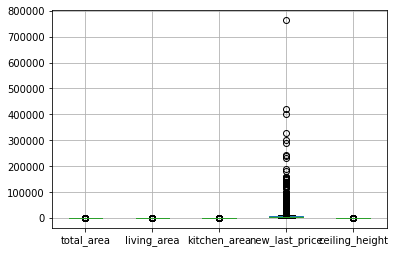

In [30]:
data.boxplot(column=['total_area', 'living_area', 'kitchen_area', 'new_last_price', 'ceiling_height'])
plt.show()

- **Цена объекта**

Самая выделяющаяся диаграмма размаха у столбца new_last_price. Построим для этого столбца отдельную и посмотрим подробнее на выбросы.

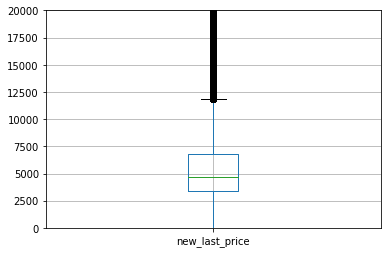

In [31]:
data.boxplot(column=['new_last_price'])
plt.ylim(0, 20000)
plt.show()

Для последней стоимости квартир в объявлениях границами нормальных значений являтся стоимость от 0 до 12 млн р (не забываем, что в столбце new_last_price у нас записана стоимость без трех нулей).

Построим гистограмму для new_last_price. На ней изображен явный пик стоимости квартир примерно 3.5-4 млн р.

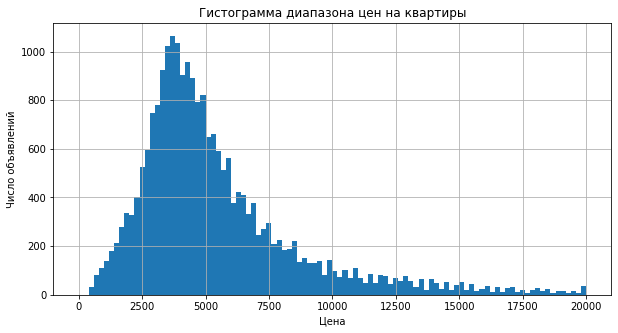

In [32]:
data['new_last_price'].hist(bins=100, figsize=(10, 5), range = (0, 20000))
plt.title('Гистограмма диапазона цен на квартиры')
plt.ylabel('Число объявлений')
plt.xlabel('Цена')
plt.show()

- **Общая площадь**

Построим для столбца total_area отдельную диаграмму размаха и посмотрим подробнее на выбросы, далее - гистограмму методом .hist() для более подробного анализа данных. 

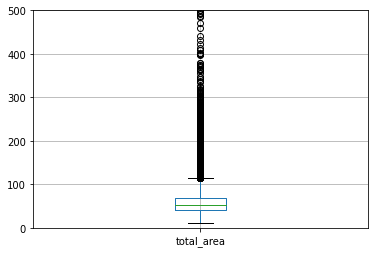

In [33]:
data.boxplot(column=['total_area'])
plt.ylim(0, 500)
plt.show()

Нижний «ус» упирается в минимальное значение 12 м. Верхний заканчивается около 105 м — это входит в  1,5 межквартильного размаха, добавленного к 3-му квартилю (он у нас по описанию столбца равен 69.7). Это ориентировочная граница нормального размаха. 

На гистограмме пик приходится на число квартир с площадью от 30м до 45м (можем подробнее посмотреть эти столбцы, если поменяем один из параметров hist range = (10, 100)). 

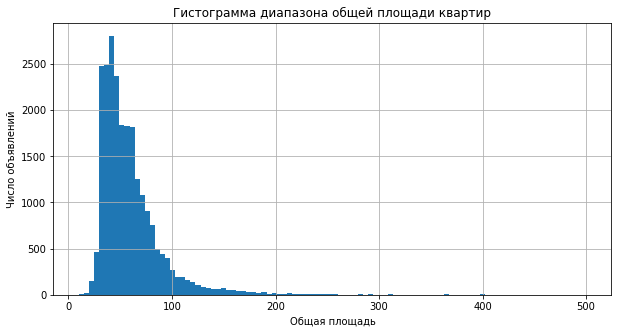

In [34]:
data['total_area'].hist(bins=100, figsize=(10, 5), range = (10, 500))
plt.title('Гистограмма диапазона общей площади квартир')
plt.ylabel('Число объявлений')
plt.xlabel('Общая площадь')
plt.show()

- **Жилая площадь**

Построим для столбца living_area отдельную диаграмму размаха и посмотрим подробнее на выбросы, далее - гистограмму методом .hist() для более подробного анализа данных. 

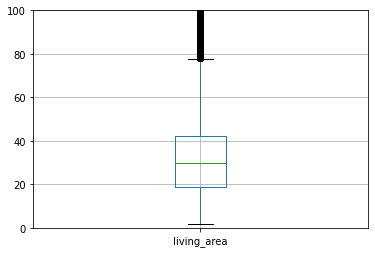

In [35]:
data.boxplot(column=['living_area'])
plt.ylim(0, 100)
plt.show()

Верхний 'ус' заканчивается около 78 кв м - это входит в  1,5 межквартильного размаха, добавленного к 3-му квартилю (он у нас по описанию столбца равен 41). Это ориентировочная граница нормального размаха.

Построим гистограмму для living_area. Гистограмма выглядит не совсем стандартно, поскольку имеются два пика и они приходятся на квартиры с жилой площадью примерно 15-18 м и 30 м (можем подробнее посмотреть эти столбцы, если поменяем один из параметров hist на range = (0, 40)).

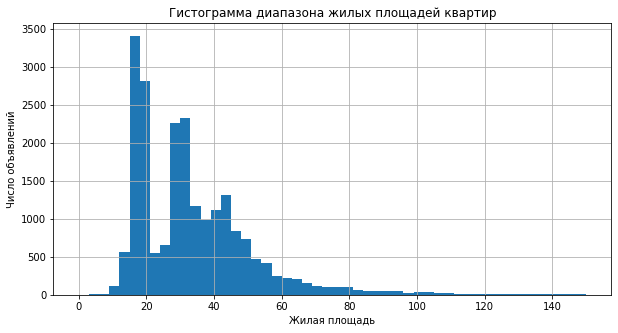

In [36]:
data['living_area'].hist(bins=50, figsize=(10, 5), range = (0, 150))
plt.title('Гистограмма диапазона жилых площадей квартир')
plt.ylabel('Число объявлений')
plt.xlabel('Жилая площадь')
plt.show()

Таким образом, в таблице преобладают данные с жилыми площадями до 70 м. Если рассматривать квартиры-студии, то как раз жилая площадь может быть минимальна. Исходя из реальных объявлений, например на Авито, продажа квартир с общей площадью, равной 10 кв м, не является редкостью.

- **Площадь кухни**

Построим для столбца kitchen_area отдельную диаграмму размаха и посмотрим подробнее на выбросы, далее - гистограмму методом .hist() для более подробного анализа данных.

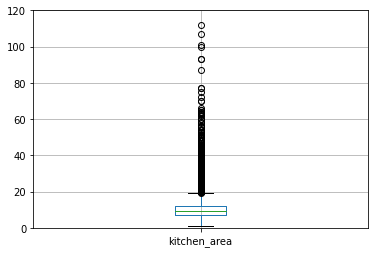

In [37]:
data.boxplot(column=['kitchen_area'])
plt.ylim(0, 120)
plt.show()

Нижний «ус» упирается в минимальное значение 1.3 м. Верхний 'ус' заканчивается около 18 м и входит в 1,5 межквартильного размаха, добавленного к 3-му квартилю (он у нас по описанию столбца равен 11.4). 

На гистограмме мы отчетливо видим пик с площадью кухонь, 8-11 кв м.

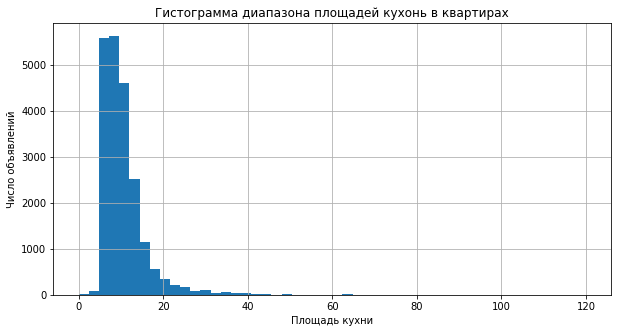

In [38]:
data['kitchen_area'].hist(bins=50, figsize=(10, 5), range = (0, 120))
plt.title('Гистограмма диапазона площадей кухонь в квартирах')
plt.ylabel('Число объявлений')
plt.xlabel('Площадь кухни')
plt.show()

Таким образом, у нас остались квартиры с кухнями от 1,3 м кв до 18 кв м. Вполне возможно, что в квартирах-студиях площадь кухонной зоны как раз и составляет наш минимум.

- **Высота потолков**

Потолки высотой 100 м это что-то за гранью реальности. Хотя для лофтов и пентхаусов и характерны более высокие потолки, но явно не высотой с Исаакиевский собор. Больше похоже на выбросы и аномальные значения.
Рассмотрим и оработаем аномалии. Построим диаграмму размаха.

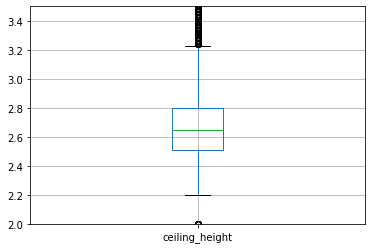

In [39]:
data.boxplot(column=['ceiling_height'])
# Слишком маленький, ничего тольком не видно, уменьшим лимит вертикальной оси
plt.ylim(2, 3.5)
plt.show()

Под нижним 'усом' видны выбросы, то есть потолки ниже 2.2 м являются аномалиями (это входит в  1,5 межквартильного размаха, добавленного к 3-му квартилю (он у нас по описанию столбца равен 2.5). Верхний 'ус' заканчивается около 3.2 м - это входит в  1,5 межквартильного размаха, добавленного к 3-му квартилю (он у нас по описанию столбца равен 2.8). Это ориентировочная граница нормального размаха.

В столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. 

In [40]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [41]:
# Исправим эти значения. Теперь у нас в столбце нет невообразимых высот.
#data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
#data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
#data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5)
#data['ceiling_height'] = data['ceiling_height'].replace(20, 2.0)
#data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)
#data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7)
#data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
#data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)
#data['ceiling_height'] = data['ceiling_height'].replace(100, 10.0)
#data['ceiling_height'] = data['ceiling_height'].replace(14, 1.4)
#data['ceiling_height'] = data['ceiling_height'].replace(10.3, 1.3)
#data['ceiling_height'].unique()

Создадим функцию, в которой если значение высоты потолка превышает 20 м, то нужно будет эту высоту разделить на 10.

In [42]:
def ceil_change (ceiling_height):
    if ceiling_height >= 20.0:
        return ceiling_height/10
    else:
        return ceiling_height

In [43]:
data['ceiling_height'] = data['ceiling_height'].apply(ceil_change)

Посмотрим, какие уникальные значения высоты потолков остались. 

In [44]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Снова проверим выбросы - теперь верхний уровень не превышает 3.25 м, нижний - 2.25. Все значения выше и ниже остаются аномалиями.

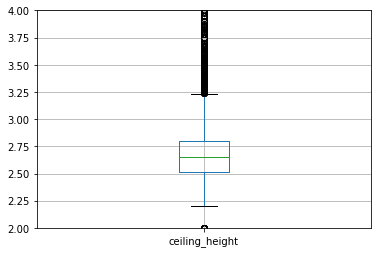

In [45]:
data.boxplot(column=['ceiling_height'])
plt.ylim(2, 4)
plt.show()

Построим гистограмму ceiling_height. Мы видим пик, который соответствует квартирам с потолками примерно 2.5 м.

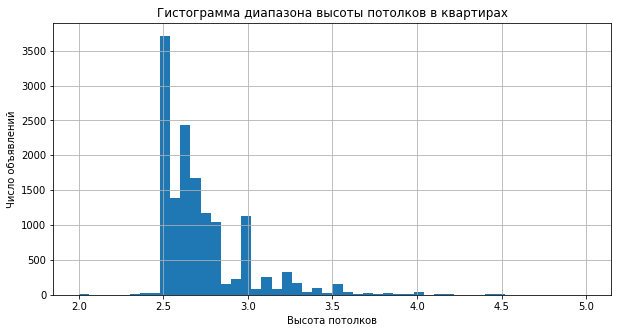

In [46]:
data['ceiling_height'].hist(bins=50, figsize=(10, 5), range = (2, 5))
plt.title('Гистограмма диапазона высоты потолков в квартирах')
plt.ylabel('Число объявлений')
plt.xlabel('Высота потолков')
plt.show()

Продолжим анализировать параметры, теперь приступим к следующей группе:
- **тип этажа квартиры;**
- **общее количество этажей в доме;**
- **количество комнат;**
- **расстояние до центра города в метрах;**
- **расстояние до ближайшего парка.**

- **Тип этажа квартиры**

Ранее мы создали столбец с типом этажа («первый», «последний», «другой»). В этом столбце у нас записаны данные типа object, мы можем сгруппировать по типу этажа количество квартир в объявлениях. 

In [47]:
print('Всего объявлений:', data['type_floor'].count())
group_type_floor = data.groupby('type_floor')['type_floor'].count()
group_type_floor

Всего объявлений: 23565


type_floor
другой       17326
первый        2909
последний     3330
Name: type_floor, dtype: int64

Построим гистограмму для оценки соотношения типов этажей.

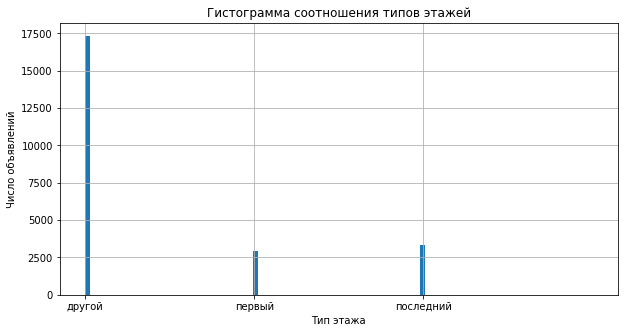

In [48]:
data['type_floor'].hist(bins=100, figsize=(10, 5), range = (0, 3))
plt.title('Гистограмма соотношения типов этажей')
plt.ylabel('Число объявлений')
plt.xlabel('Тип этажа')
plt.show()

На круговой диаграмме будет лучше видно процентное соотношение типов этажей в объявлениях.

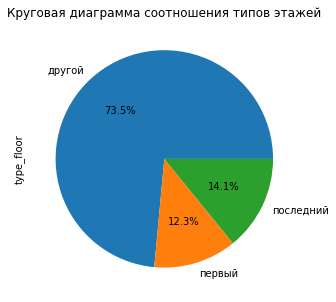

In [49]:
group_type_floor.plot(y = 'count', kind='pie', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Круговая диаграмма соотношения типов этажей')
plt.show()

Первые и последние этажи занимают почти равные доли (12.3% и 14.1% соответственно). В основном, большая часть объявлений идет о продаже квартир категории 'другой' (73.5%). Квартиры на первых и последних этажах могут реже продаваться по некторым причинам, например:
- у владельцев квартир на последнем этаже, нет соседей сверху и зачастую хороший вид из окна, меньше шума с улиц
- у владельцев квартир на первом этаже в шаговой доступности подъезд и выход на улицу, а также они не зависят от поломок лифта.

- **Общее количество этажей в доме**

Нас интересует столбец floors_total. Из описания данных следует, что стандартное отклонение на 6.6 превышает среднее значение, есть выбросы.

In [50]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Построим диаграмму размаха и посмотрим, какое количество данных входит в нормальные значения. Нижний 'ус' упирается в минимальное значение 1. Верхний 'ус' заканчивается около 29 и входит в  1,5 межквартильного размаха, добавленного к 3-му квартилю.

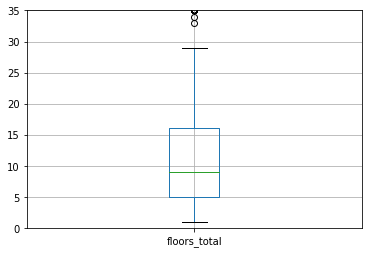

In [51]:
data.boxplot(column=['floors_total'])
plt.ylim(0, 35)
plt.show()

Построим гистограмму, чтобы зрительно оценить результат. 

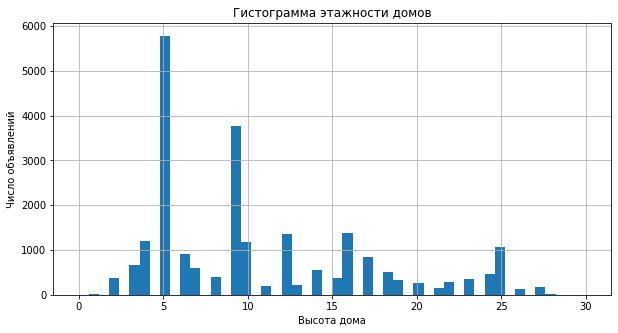

In [52]:
data['floors_total'].hist(bins=50, figsize=(10, 5), range = (0, 30))
plt.title('Гистограмма этажности домов')
plt.ylabel('Число объявлений')
plt.xlabel('Высота дома')
plt.show()

На гистограмме видно, что, в основном, в объявлениях значатся квартиры на продажу в домах высотой 5, 9 этажей. Пятиэтажные здания заметно лидируют. Минимальное значение для этажей - 1. Поскольку у нас имеются данные не только по г Санкт-Петербургу, но и по прилежащих к нему деревням и поселкам, вполне возможно, что в этих объявлениях идет речь о продаже квартир в одноэтажных домах, например, рассчитанных на 4 или 2 семьи. 

- **Количество комнат**

Сгруппируем rooms, чтобы узнать варианты записи комнат и их количество в столбце. Выяснилось, что в некоторых квартирах число комнат равно 0 (193 строк). Скорее всего это апартаменты или студии.

In [53]:
data.groupby('rooms')['rooms'].count()

rooms
0      194
1     8004
2     7897
3     5779
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
11       2
12       1
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

Из описания столбца следует, что самое большое количество комнат - 19, наименьшее - 0, а стандарное отклонение равно 1. Выбросы имеются, рассмотрим их.

In [54]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим диаграмму размаха и посмотрим, какое количество данных входит в нормальные значения. 

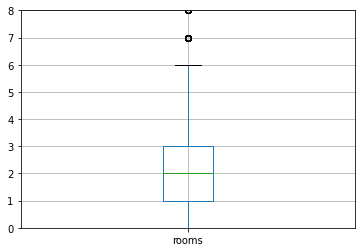

In [55]:
data.boxplot(column=['rooms'])
plt.ylim(0, 8)
plt.show()

Нижний «ус» упирается в минимальное значение 0. Верхний 'ус' заканчивается на значении 6 и входит в 1,5 межквартильного размаха, добавленного к 3-му квартилю. В пределы нормальных значений входят квартиры с количеством комнат 0-6.

Построим гистограмму и рассмотрим ее.

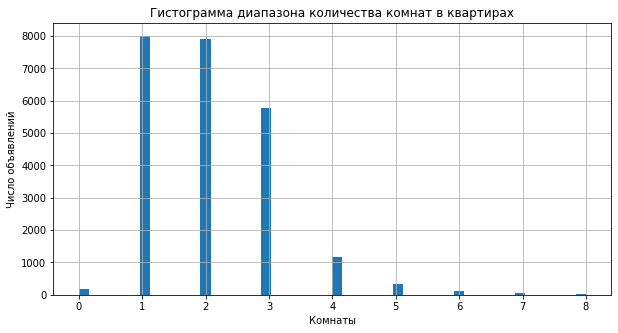

In [56]:
data['rooms'].hist(bins=50, figsize=(10, 5), range = (0, 8))
plt.title('Гистограмма диапазона количества комнат в квартирах')
plt.ylabel('Число объявлений')
plt.xlabel('Комнаты')
plt.show()

По большей части даны объявления о продажи квартир, имеющих 1-3 комнаты.

 - **Расстояние до центра города**
 
Данный столбец cityCenters_nearest должен был быть заполнен внешним геосервисом, но все пропуски в нем мы заменили на медианное значение. Из описания столбца следует, что самое большое расстояние от центра - почти 66 км, наименьшее - 181 м, а стандарное отклонение равно 7555(!), что свидетельствует о большом количестве выбросов. Рассмотрим их.

In [57]:
data['cityCenters_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Построим диаграмму размаха и посмотрим, какое количество данных входит в нормальные значения. Нижний 'ус' заканчивается у минимального значения. Верхний 'ус' заканчивается около 27 км. В диапазон нормальных значений входят расстояния от 0 до 27 км.

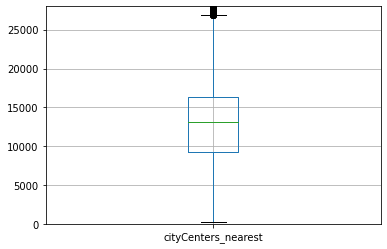

In [58]:
data.boxplot(column=['cityCenters_nearest'])
plt.ylim(0, 28000)
plt.show()

Построим гистограмму и рассмотрим ее. Основной пик приходится на 15 км и на 12 км. Но эти данные нельзя считать целостными, поскольку в исходной таблице около 50% пропусков было в столбцах, заполняемых с помощью посторонних геосервисов. 

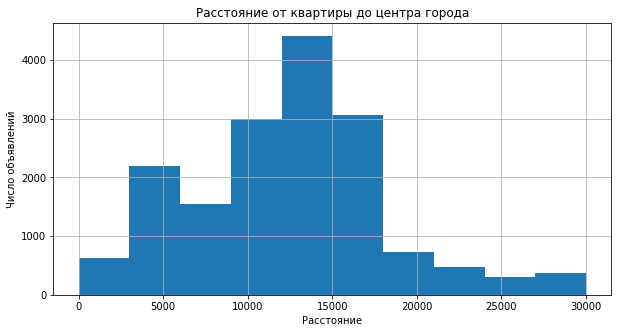

In [59]:
data['cityCenters_nearest'].hist(bins=10, figsize=(10, 5), range = (0, 30000))
plt.title('Расстояние от квартиры до центра города')
plt.ylabel('Число объявлений')
plt.xlabel('Расстояние')
plt.show()

- **Расстояние до ближайшего парка**
Данный столбец parks_nearest должен был быть заполнен внешним геосервисом, но все пропуски в нем мы оставили. Из описания столбца следует, что самое большое расстояние до парка - около 3 км, наименьшее - 1 м, а стандарное отклонение равно 200, что свидетельствует о большом количестве выбросов. Рассмотрим их.

In [60]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Построим диаграмму размаха и посмотрим, какое количество данных входит в нормальные значения. От 0 до 1.1 км.

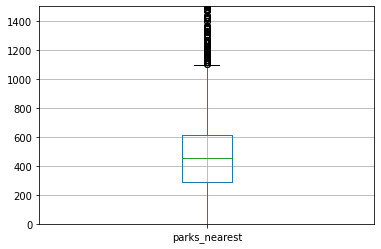

In [61]:
data.boxplot(column=['parks_nearest'])
plt.ylim(0, 1500)
plt.show()

Построим гистограмму и рассмотрим ее. Из-за того, что пропусков в столбце было около 50%, на гистограмме отчетливо виден пик от 400 до 500 м. Но эти данные нельзя считать целостными, поскольку в исходной таблице около 50% пропусков было на столбцы, заполняемые с помощью посторонних геосервисов.

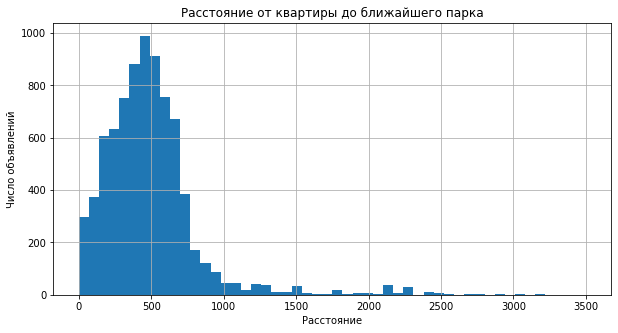

In [62]:
data['parks_nearest'].hist(bins=50, figsize=(10, 5), range = (0, 3500))
plt.title('Расстояние от квартиры до ближайшего парка')
plt.ylabel('Число объявлений')
plt.xlabel('Расстояние')
plt.show()

Удалим из таблицы строки с аномальными значениями.

In [63]:
data.drop(data.loc[data['total_area'] > 105].index, inplace=True)
data.drop(data.loc[data['living_area'] > 72 ].index, inplace=True)
data.drop(data.loc[data['kitchen_area'] > 18 ].index, inplace=True)
data.drop(data.loc[data['ceiling_height'] < 2.25 ].index, inplace=True)
data.drop(data.loc[data['ceiling_height'] > 3.25 ].index, inplace=True)
data.drop(data.loc[data['new_last_price'] > 12000 ].index, inplace=True)
data.drop(data.loc[data['floors_total'] > 30 ].index, inplace=True)
data.drop(data.loc[data['rooms'] > 7 ].index, inplace=True)
data.drop(data.loc[data['cityCenters_nearest'] > 26000 ].index, inplace=True)
data.drop(data.loc[data['cityCenters_nearest'] < 4500 ].index, inplace=True)
data.drop(data.loc[data['parks_nearest'] > 1100 ].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17771 entries, 1 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            17771 non-null  int64         
 1   last_price              17771 non-null  float64       
 2   total_area              17771 non-null  float64       
 3   first_day_exposition    17771 non-null  datetime64[ns]
 4   rooms                   17771 non-null  int64         
 5   ceiling_height          10641 non-null  float64       
 6   floors_total            17771 non-null  int64         
 7   living_area             16326 non-null  float64       
 8   floor                   17771 non-null  int64         
 9   is_apartment            17771 non-null  bool          
 10  studio                  17771 non-null  bool          
 11  open_plan               17771 non-null  bool          
 12  kitchen_area            16003 non-null  float6

In [64]:
#data['living_area'] = data['living_area'].fillna(data['living_area'].median())
#data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
#data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
#data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())

После того, как мы удалили строки с аномальным значением осталось 17771 строк из 23699. Но в столбцах с количеством парков и прудов до сих пор много пропущенных значений. Однако, удалять еще больше строк не имеет смысла, так мы лишимся почти всех данных.

In [65]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,40.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


В ходе анализа данных в столбцах были проведены следующие мероприятия:
    
- в столбце ceiling_height были выявлены и скорректированы с помощью функции самые нереалистичные варианты (потолки 100 и 30 м).
- в столбцах с площадями, расстояниями, количествами этажей и комнат были выявлены аномалии.
- все строки с выбросами были удалены, поскольку могут повлиять впоследствии на анализ данных в целом.

**2. Изучить, как быстро продавались квартиры (days_exposition)** 

Этот параметр показывает, сколько дней было размещено каждое объявление.
Первым делом посмотрим общую информацию по столбцу.
Самое малое количество дней, в которое было размещено объявление - 1, дольше всего висело объявление 1580 дней (более 4 лет(!)).

In [66]:
data['days_exposition'].describe()

count    15623.000000
mean       165.878320
std        204.410871
min          1.000000
25%         42.000000
50%         88.000000
75%        207.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим гистограмму по известным нам строкам.

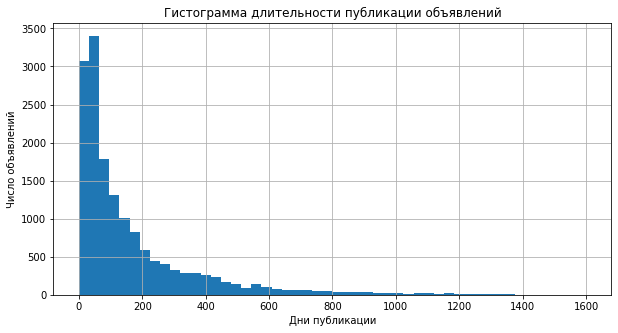

In [67]:
data['days_exposition'].hist(bins=50, figsize=(10,5), range = (0, 1600))
plt.title('Гистограмма длительности публикации объявлений')
plt.ylabel('Число объявлений')
plt.xlabel('Дни публикации')
plt.show()

Первое впечатление, что большая часть квартир была распродана в довольно короткий срок (от общего числа объявлений). Редко какое объявление о продаже задерживается на более чем 600 дней. Очень резкий спад идет примерно на 90й день продажи. Около 3х месяцев требуется на продажу большей части квартир. Тенденция на постепенный спад продаж продолжается до 200 дней. А далее значения продаж становятся все меньше.

Теперь посчитаем среднее значение и медиану. Они нам потребуются, чтобы выяснить оптимальное время продажи.

In [68]:
print('Медианное значение времени продажи квартир:', data['days_exposition'].median())

print('Среднее значение времени продажи квартир:', data['days_exposition'].mean())

Медианное значение времени продажи квартир: 88.00000000000001
Среднее значение времени продажи квартир: 165.8783204250144


Как и предполагалось, медианное значение равно 87 дням, то есть почти 3 месяца. А вот после полугода следуют равномерные продажи. 

Составим гистограммы для определения срока самых быстрых продаж и самых медленных.

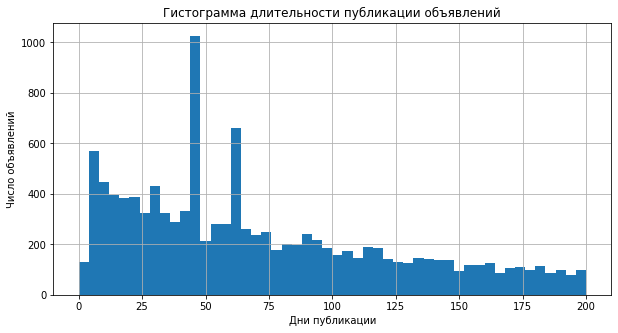

In [69]:
data['days_exposition'].hist(bins=50, figsize=(10,5), range = (0, 200))
plt.title('Гистограмма длительности публикации объявлений')
plt.ylabel('Число объявлений')
plt.xlabel('Дни публикации')
plt.show()

Самые ранние продажи были совершены на первой неделе размещения объявления. В течении последующих 3 месяцев видны пики продаж на 45 и 60 дни.

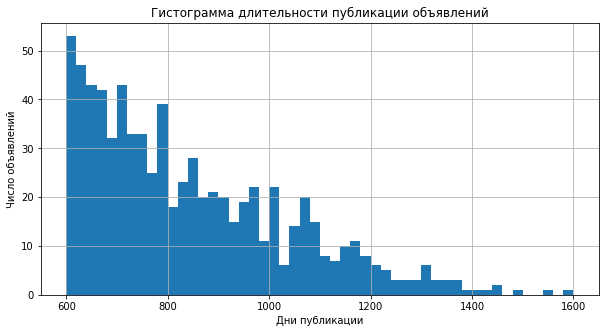

In [70]:
data['days_exposition'].hist(bins=50, figsize=(10,5), range = (600, 1600))
plt.title('Гистограмма длительности публикации объявлений')
plt.ylabel('Число объявлений')
plt.xlabel('Дни публикации')
plt.show()

Очевидно, что количество объявлений, висящих более 2х лет на сайте, снижается.

Если проанализировать количество продаж за первый и третий квартиль (42 и 206 дни соответственно), то видно, что:
- за 42 дня публикаций объявлений (менее 25% от всех наблюдений)число продаж постепенно падает, но в конце первой недели число продаж возрастает, также пик наблюдается в конце первого месяца после публикации объявления.
- за 206 дней публикации также видны скачки продаж на 40 и 60 день, но в основном наблюдается равномерый спад продаж.

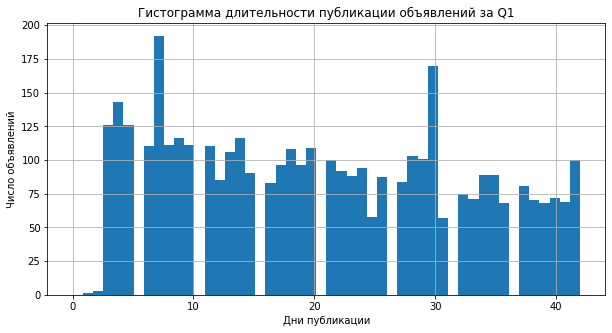

In [71]:
data['days_exposition'].hist(bins=50, figsize=(10,5), range = (0, 42))
plt.title('Гистограмма длительности публикации объявлений за Q1')
plt.ylabel('Число объявлений')
plt.xlabel('Дни публикации')
plt.show()

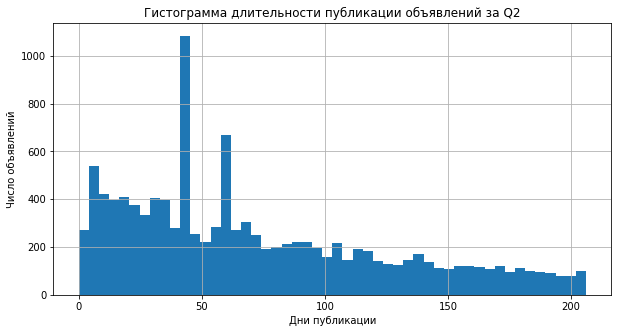

In [72]:
data['days_exposition'].hist(bins=50, figsize=(10,5), range = (0, 206))
plt.title('Гистограмма длительности публикации объявлений за Q2')
plt.ylabel('Число объявлений')
plt.xlabel('Дни публикации')
plt.show()

Перейдем к следующему заданию.

***3. Нам необходимо определить факторы, которые больше всего влияют на общую (полную) стоимость объекта***.

Узнаем зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Во время исследования построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией будем использовать сводные таблицы.

- ***Зависимость цены от общей площади***

Нас интересуют 3 столбца:
1. last_price (или new_last_price)
2. total_area
3. price_per_meter

Можно предположить, что с увеличением общей площади, цена будет расти. Сгруппируем таблицу по нужным нам столбцам.

In [73]:
group_data = data[['total_area', 'last_price', 
                    'price_per_meter']].sort_values(by='total_area', ascending=False)
display(group_data)

,total_area,last_price,price_per_meter
7966,105.0,6500000.0,61904.76
18521,105.0,9200000.0,87619.05
6703,105.0,10600000.0,100952.38
22407,105.0,11277800.0,107407.62
22490,105.0,10990000.0,104666.67
...,...,...,...
8886,15.5,2450000.0,158064.52
12040,15.0,1900000.0,126666.67
16949,15.0,1550000.0,103333.33
19642,14.0,1190000.0,85000.00


Судя по этой предварительной табличке не все так однозначно: у квартир с полощадью 105 кв м общая стоимость может составлять 6.5 млн р или 11.3 млн р, а у квартиры с площадью 13 кв м цена одного квадрата равна цене квадрата в 105 метровой квартире.

Изучим корреляцию. Корреляция в 0.66 говорит о наличии слабой связи цены и площади. Увеличение площади может способствовать повышению цены, но не всегда.

In [74]:
print(data['total_area'].corr(data['new_last_price']))

0.6613254053188793


Для визуализации возможной зависимости цены на квартиру от ее общей площади построим диаграмму рассеяния, где каждой точкой на плоскости будет отмечено объявление о продаже по координатам цена/общая площадь. 
    
С помощью такого графика мы продемонстрируем наличие корреляции между ценой/общей площадью. 

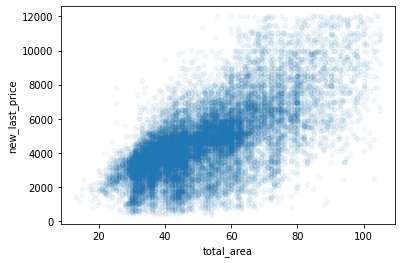

In [75]:
data.plot(x='total_area', y='new_last_price', kind='scatter', alpha=0.05) 
plt.show()

На графике видно, что наша корреляция хоть и не доходит до 1, но имеет положительный коэффициент. А это значит, что зависимость между ценой и общей площадью есть. В массиве данных преобладают квартиры с площадью 30-60 кв м и по цене от 2.5 до 6 млн руб, но все равно можно заметить, как площадь влияет на цену у более редких объявлений с большими квартирами.
    
Подсчитаем корреляцию Пирсона и для столбца price_per_meter, а также построим график рассеивания.
    
Корреляция составила -0.09, но график выглядит уже по-другому. Коэффициент отрицательный, но ближе к 0. Связи между общей площадью и ценой за кв м практически нет. 

In [78]:
print(data['total_area'].corr(data['price_per_meter']))

-0.08906734293719008


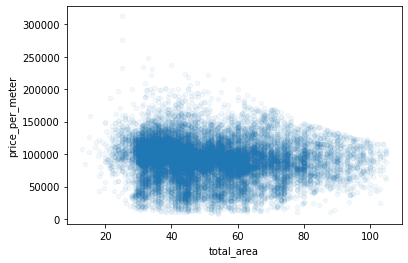

In [79]:
data.plot(x='total_area', y='price_per_meter', kind='scatter', alpha=0.05) 
plt.show()

**Гипотеза оказалась верна**. Чем больше площадь квартиры, тем выше за нее цена. 

***За исключением таких факторов, как***:
1. при построении этого графика мы не учитывали помимо площади и другие факторы, такие как удаленность от центра или близость к станциям метро (площадь квартиры 20 кв м в 5 минутах ходьбы от станции будет оценена дороже, чем квартира 40 кв м в 30 минутах езды до станции),
2. при равных долях объявлений о продаже (10 объявлений с квартирами 20 кв м, 10 - с квартирами 30 кв м и тд), результаты могли бы быть совершенно другими.

- ***Зависимость цены от жилой площади***

Нас интересуют 2 столбца:
1. last_price (или new_last_price)
2. living_area

Можно предположить, что жилая площадь влияет на увеличечение цены. Аналогично предыдущему пункту сгруппируем таблицу.

In [80]:
group_data2 = data[['living_area', 'last_price']].sort_values(by='living_area', ascending=False)
display(group_data2)

,living_area,last_price
20535,72.0,9000000.0
5228,72.0,10800000.0
1786,71.9,9690000.0
19342,71.7,9700000.0
1267,71.5,9200000.0
...,...,...
23613,NaN,3950000.0
23632,NaN,5000000.0
23663,NaN,6400000.0
23670,NaN,2450000.0


Посмотрим на значение корреляции: 0.5 говорит нам о том, что есть связь между увеличением жилой площади и цены за квартиру.

In [82]:
data['living_area'].corr(data['new_last_price'])

0.5354908349725341

Построим диаграмму рассеивания по столбцам living_area и new_last_price. 
    
На диаграмме особенно выдеяются три темных 'пятна' - это группы квартир с жилыми площадями 13-20 кв м (цена 1-5 млн р), 25-35 кв м (цена 2-6 млн р), 35-40 кв м (цена 4-8 млн р). Видна закономерность, что с увеличением жилой площади растет цена на квартиру, по голубым точкам правом верхнем углу это тоже заметно.

In [ ]:
data.plot(x='living_area', y='new_last_price', kind='scatter', alpha=0.05) 
plt.show()

**Гипотеза оказалась верна**. График отображает, что чем больше жилая площадь, тем выше цена за квартиру. 
Не будем забывать, что как и на прошлом графике зависимости цены от общей площади, здесь также есть столбцы, которые ниже предыдущих. Возможно, на это данные могли повлиять те же факторы.


- **Зависимость цены от площади кухни**

Нас интересуют 2 столбца:
1. last_price (или new_last_price)
2. kitchen_area

Можно предположить, что площадь кухни тоже влияет на увеличение цены. Создадим функцию, в которой присвоим площадям кухонь округленные значения, и для этой функции новый столбец.

In [ ]:
group_data3 = data[['kitchen_area', 'last_price']].sort_values(by='kitchen_area', ascending=False)
display(group_data3)

Посмотрим на корреляцию Пирсона, он равен 0,47 и коэффициент положительный. Слабая связь между увеличением площади кухни имеется.
    
График также отображает постепенное учеличение цены вслед за увеличением площади кухни.

In [83]:
data['kitchen_area'].corr(data['new_last_price'])

0.4688226386354502

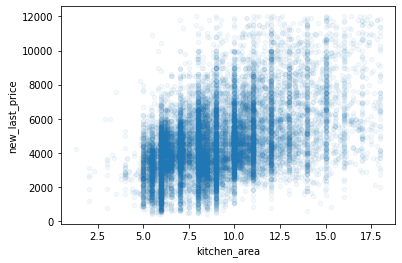

In [84]:
data.plot(x='kitchen_area', y='new_last_price', kind='scatter', alpha=0.05) 
plt.show()

**Наша гипотеза подтверждена**.
Как видно на графике, с увеличением площади кухни цена возрастает. Стоит также обратить внимание на то, что у нас имеются вертикальные 'полосы' на графике, а это значит, что у некоторых квартир цена не записит от площади кухни. 

- **Зависимость цены от количества комнат**

Нас интересуют 2 столбца:
1. last_price (или new_last_price)
2. rooms

Можно предположить, что чем больше число комнат в квартире, тем цена на нее выше.

Построим столбчатую диаграмму соотношения цены и числа комнат.

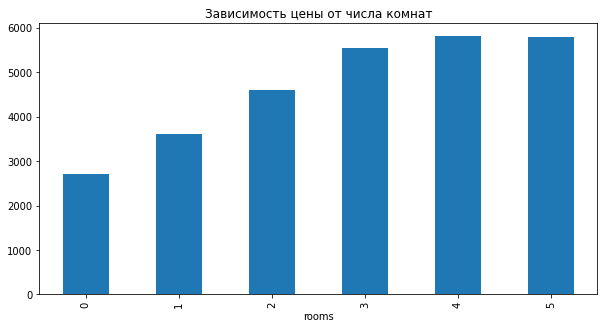

In [85]:
data_filtered4 = data.groupby('rooms')['new_last_price'].median()
data_filtered4.plot(x='rooms', y='new_last_price', 
                   title= 'Зависимость цены от числа комнат', kind='bar', figsize=(10,5))
plt.show()

**Гипотеза подтверждена**

Чем больше в квартире комнат, тем больше цена за эту квартиру. Однако, в квартире может быть 5 комнат, но по общей площади она будет меньше трехкомнатной, или будет находится очень далеко от станции метро, что в свою очередь снизит цену.

- **Зависимость цены от этажа, на котором расположена квартира**

Нас интересуют 2 столбца:
1. last_price (или new_last_price)
2. type_floor

Допустим, что чем выше расположена квартира, тем больше на нее цена. Расположение квартиры на первом или последнем этажах имеет множество плюсов, из-за которых цена на такие квартиры возрастет. Но так же есть и минусы (на последнем этаже может протекать крыша, а под окном первого этажа может находится рюмочная с веселым и шумным контингентом или из подвала до квартиры будут на постоянной основе летать комары). Это в свою очередь снизит цену. Можно жить на 15м из 30 этажей в новостройке с видом на Финский залив у Лахта-центра, а можно жить на 2м этаже бывшего доходного дома на Невском проспекте. 

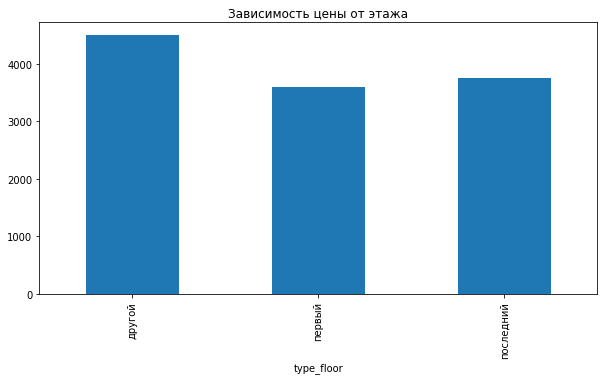

In [86]:
data_filtered5 = data.groupby('type_floor')['new_last_price'].median()
data_filtered5.plot(x='type_floor', y='new_last_price', 
                   title= 'Зависимость цены от этажа', kind='bar', figsize=(10,5))
plt.show()

**Гипотеза подтвердилась**. 

На квартиры на первых этажах наименьшая цена. Ранее мы проводили анализ столбца type_floor и оказалось, что у  нас из всех объявлений 73% приходятся на квартиры, расположенные на 'другом' этаже. Если учитывать 'первый' и 'послений' этажи в общей сумме занимают только четверть всех объявлений, то при равных долях было бы интересно понаблюдать за корреляцией цена/этаж.

- **Зависимость цены от даты размещения объявления**

Нас интересуют 4 столбца:
1. last_price (или new_last_price)
2. day_of_week_exposition
3. month_exposition
4. year_exposition

Предположим, что чем раньше было выложено объявление, тем меньше цена на квартиру (не забываем про инфляцию, геополитические изменения, период пандемии). На цену квартиры может также повлиять месяц, в который было выложено объявление, например, если выложить объявление в летний период времени цена может повысится из-за сезона выпуска школьников и приобретения их родителями квартир для будущих студентов. Или наоборот цена может снизится из-за оттока населения в другие регионы или покупки домов и участков, а не квартир.

Построим график зависимости цены на квартиру от дня недели при размещении объявления.

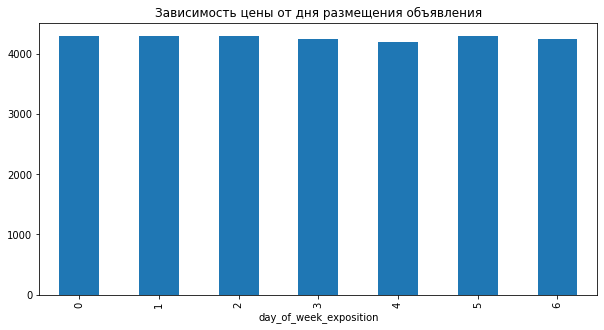

In [87]:
data_filtered6 = data.groupby('day_of_week_exposition')['new_last_price'].median()
data_filtered6.plot(x='day_of_week_exposition', y='new_last_price', 
                   title= 'Зависимость цены от дня размещения объявления', kind='bar', figsize=(10,5))
plt.show()

Как таковой зависимости от дня недели, когда было размещено объявление, нет. Мы видим практически равные столбцы.

Построим график зависимости цены на квартиру от месяца размещения объявления.

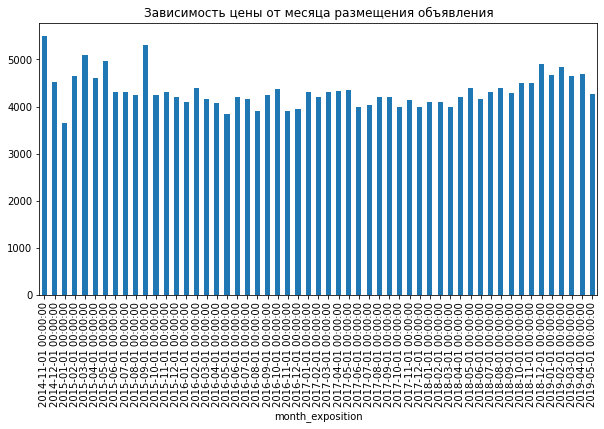

In [88]:
data_filtered6 = data.groupby('month_exposition')['new_last_price'].median()
data_filtered6.plot(x='month_exposition', y='new_last_price', 
                   title= 'Зависимость цены от месяца размещения объявления', kind='bar', figsize=(10,5))
plt.show()

На графике отображены месяцы за 2014-2019 годы. Самое большое колебание цен на недвижимость в Санкт-Петербурге и Лен области видно с ноября 2014 г по ноябрь 2015 г. А также заметен подъем цен вначале 2019 года.
    
Построим график зависимости цены на квартиру от года размещения объявления.

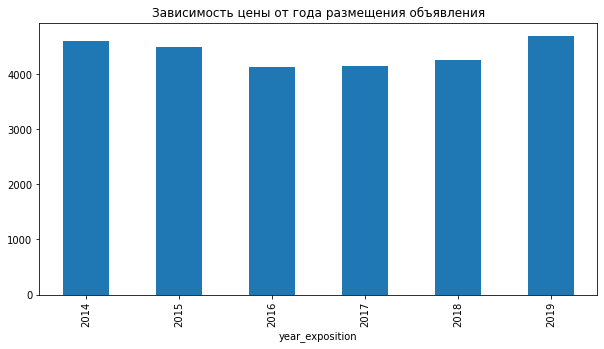

In [89]:
data_filtered6 = data.groupby('year_exposition')['new_last_price'].median()
data_filtered6.plot(x='year_exposition', y='new_last_price', 
                   title= 'Зависимость цены от года размещения объявления', kind='bar', figsize=(10,5))
plt.show()

В 2015 году цены на квартиры поднялись примерно на 20%, потом они вернулись в пределы 2014 г. С 2017 г по 2019 г наблюдается рост цен на квартиры в г Санкт-Петербург. **Наша гипотеза подтверждена**.

Таким образом, мы проанализировали зависимость цены от таких факторов, как:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).

Обобщая все рассчеты, можно выделить то, что на стоимость квартир больше всего влияют площадь, количество комнат, год размещения. 

В большинстве случаев мы видим прямую зависимость, когда с ростом первого критерия, растет и второй или чем меньше первый критерий, тем меньше и второй.
1. увеличение общей площади (включая кухню и жилые помещения) способствует увеличению цены,
2. чем больше комнат, тем выше стоимость объекта,
3. стоимость квартир на первых этажах ниже, чем на остальных.

**4. Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Нам потребуются столбцы:
1. locality_name 
2. price_per_meter

Предположим, что чем дальше от Санкт-Петербурга населенный пункт, тем дешевле квартиры.

Подсчитаем, в каких 10 населенных пунктах самое большое число объявлений. В топе с отрывом лидирует Санкт-Петербург.

In [90]:
data_local_name = data['locality_name'].value_counts().head(10) 
print(data_local_name)

# Теперь сформируем датафрейм по топ-10 населенным пунктам

top10_name = data['locality_name'].value_counts().index.tolist()[:10]
avg_metrs = [data[data['locality_name'] == name]['price_per_meter'].median().round(2) for name in top10_name]
data_name = {'Населенный пункт': top10_name, 'Средняя цена за кв м': avg_metrs}
data_name_final = pd.DataFrame(data_name).sort_values(by='Средняя цена за кв м', ascending=False)
data_name_final

Санкт-Петербург            11858
Мурино                       570
Кудрово                      435
Всеволожск                   380
поселок Парголово            316
Гатчина                      297
поселок Шушары               249
Выборг                       212
деревня Новое Девяткино      139
Сертолово                    132
Name: locality_name, dtype: int64


,Населенный пункт,Средняя цена за кв м
0,Санкт-Петербург,101515.15
2,Кудрово,95918.92
4,поселок Парголово,92202.38
1,Мурино,86365.05
6,поселок Шушары,78787.88
8,деревня Новое Девяткино,74025.97
5,Гатчина,67695.96
9,Сертолово,67683.74
3,Всеволожск,65594.70
7,Выборг,58001.42


**Гипотеза подтверждена**

В среднем, самый дорогой квадратный метр именно в Санкт-Петербурге (103785 т р), следом идут Кудрово, Парголово и Мурино - они расположены вплотную к границе города Санкт-Петербург. А вот город Кириши, который находится на границе Ленобласти может похвастаться 38850 т р за кв м площади квартир.

**4. Cредняя стоимость квартир на разном удалении от центра**

Нам потребуются столбцы:
1. km_cityCenters_nearest 
2. last_price (или new_last_price)
3. locality_name

Предположим, что квартиры с самой высокой стоимостью находятся в центре г Санкт-Петербурга, а по мере удаления от него квартиры становятся дешевле. 

На цену квартир может повлиять каждый километр, отдаляющий ее от центра, поэтому будем учитывать все: среднюю цену квартир в одном километре от центра, в двух и так далее. 

Построим гистограмму типа hexbin

На гистограмме отчетливо видно, что большая часть квартир из объявлений находится на удалении от центра на 15-17 км и их средняя цена варьируется от 3.5 млн р до 5 млн р.

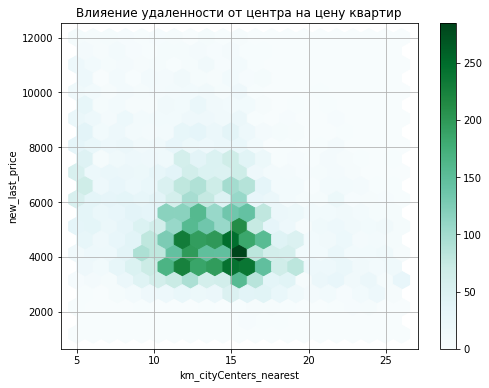

In [91]:
data.plot(x='km_cityCenters_nearest', 
          y='new_last_price', 
          kind='hexbin', 
          title= 'Влияение удаленности от центра на цену квартир', 
          gridsize=20, 
          figsize=(8, 6), 
          sharex=False, grid=True
         ) 
plt.show()

Поскольку нас интересует только г Санкт-Петербург, офильтруем с помощью метода .query() и уберем все остальные населенные пункты и подсчитаем среднюю цену по каждому километру.

In [92]:
km_spb = data.query('locality_name == "Санкт-Петербург"')
km_spb_avg = km_spb.groupby('km_cityCenters_nearest')['new_last_price'].mean()
display(km_spb_avg.head(10))

km_cityCenters_nearest
5.0     7384.632319
6.0     6884.974138
7.0     6548.428571
8.0     6395.085308
9.0     5375.055901
10.0    5339.309091
11.0    5188.523438
12.0    5229.012847
13.0    5447.926996
14.0    5208.651463
Name: new_last_price, dtype: float64

Построим гистограмму зависимости цены от удаления от центра.

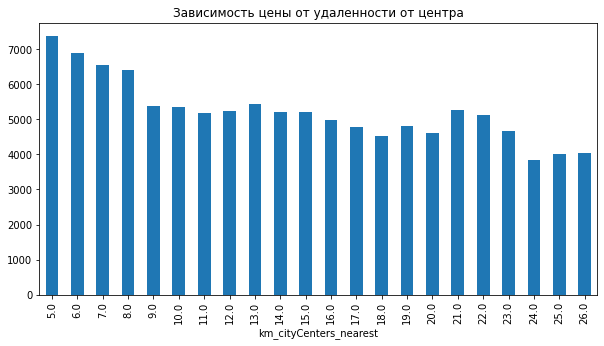

In [93]:
km_spb_avg.plot(x='km_cityCenters_nearest', 
                y='new_last_price', 
                title= 'Зависимость цены от удаленности от центра', 
                kind='bar', 
                figsize=(10,5))
plt.show()

**Наша гипотеза подтверждена** 

Стоимость объектов действительно зависит от расстояния до центра города. У нас минимальное расстояние до центра города 5 км и цена здесь самая высокая - в среднем от 7 млн р, чем больше расстояние от центра города до квартиры, тем цена ниже. 

Некоторые столбцы выше предыдущих по причинам воздействия на цену еще и других факторов, о которых мы говорили ранее - площадь, число комнат и т д). Можно купить квартиру в центре за 7 млн р, но она будет результатом перепланировки бывшей коммуналки и будет 10 кв м. А можно купить квартиру на конечной станции ветки метро в 15 км от центра за 5 млн, но по площади она будет в 4 раза больше.

### Напишите общий вывод

***Объектом*** исследования был архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

***Целью*** исследования было определить рыночную стоимость объектов недвижимости. 

В ***задачи*** исследования входили:
- провести анализ данных,
- установите параметры, влияющие на цену объектов.

В ходе работы было выполнено несколько шагов анализа исходного массива данных:
1. *изучить общую информацию БД*
Импортировали библиотеку pandas и matplotlib.pyplot, открыли файл. Воспользовавшись методом info(), мы узнали, что стартовая таблица состояла из 23699 строк и 22 столбцов, в них данные были внесены продавцами квартир, а также при помощи внешних геосервисов, описана информация по объявлениям о продаже (площади и высота потолков квартир, удаленность от центра, количество комнат, этажность зданий и этаж размещения квартиры, расположение прудов и парков);
2. *провести предобработку данных*
Во множестве строк оказались пропущенные значения, тип данных в некоторых столбцах не соответствовал действительной информации, а также встречались дубликаты и аномальные значения. 
- Для поиска пропущенных значений был применен метод .isna().sum()).
- Для некоторых столбцов был применен метод удаления drop(), поскольку пропуски в locality_name и floors_total занимали менее 1% общего объема информации. Для изменения типа данных был применен метод.
- Для столбца balcony был применен метод .fillna() с заполнением пропусков значением 0 (не указаны балконы - их нет).
- Для столбца first_day_exposition применен метод to_datetime(), чтобы поменять строковый тип дпнных на дату.
- Для столбцов floors_total и balcony применен метод .astype('int64'), поскольку такого явления, как 3.5 этажа или 1.34 балкона не представляется.
- Для поиска дубликатов был применен метод .unique() и с помощью функции были заменены повторяющиеся, но записанные по-разному, названия населенных пунктов.
3. *добавление новых столбцов*
Добавили новые столбцы со следующими параметрами: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах. 
- Для выделения конкретной части даты был применен метод .dt.weekday(), .astype('datetime64[M]'), .dt.year(). 
- Для столбца с категорией этажа была создана функция на основе цикла if elif else.
4. *обработка и удаление аномальных значений*
Обработали аномалии в некоторых столбцах:
- методом describe() узнали минимальные, максимальные и нормальные значения, а также стандартное отклонение.
- методом .boxplot строили диаграммы размаха для поиска диапазона нормальных значений и зачений, выходящих за их пределы.
- методом .hist() и .plot() строили диаграммы и графики для зрительной оценки результатов.
- создали функцию для изменения высоты потолков более 20 м.
- методом .drop() удалили аномально высокие и низкие значения (100 м потолки, 19 комнатные квартиры).

Таким образом, мы очистили данные от аномалий и привели их к единому типу для дальнейшего анализа.

В ходе исследования было поставленно несколько **гипотез**, которые нужно было проверить посредством рассчетов. 

Были выяснены: 
1. *скорость продажи квартир*
Большая часть квартир была распродана в довольно короткий срок - в течении 3х месяцев. Самые ранние продажи были совершены на первой неделе, а затем в конце первого месяца. Но наблюдались объявления, висящие более 3х лет на сайте.
2. *факторы, больше всего влияющие на общую стоимость объекта*
Были проведены рассчеты и построены диаграммы, так мы выяснили, что:
- чем больше площадь квартиры, тем выше за нее цена (но цена за 1 кв м может снижаться с увеличением общей площади).
- чем больше жилая площадь квартиры, тем выше за нее цена.
- чем больше площадь кухни, тем выше за квартиру цена.
- стоимость квартиры прямо пропорциональна количеству комнат - больше комнат, выше цена.
- стоимость квартир на первом этаже, ниже, чем на последующих.
- день недели не влияет на стоимость продажи квартиры.
- цена на квартиру зависит от месяца и года, в который было выложено объявление.
3. *средняя цена 1 кв м в 10 населённых пунктах с наибольшим числом объявлений*
Чем дальше от Санкт-Петербурга населенный пункт, тем дешевле квартиры. В среднем, самый дорогой квадратный метр именно в Санкт-Петербурге. Затем Кудрово, Парголово и Мурино - эти города и деревни расположены вплотную к границе города Санкт-Петербург. Самые удаленные от Санкт-Петербурга поселки и города, например Кириши, имеют самую низкую цену за 1 кв м.
4. *средняя стоимость квартир на разном удалении от центра*
Квартиры с самой высокой стоимостью находятся в центре г Санкт-Петербурга, а по мере удаления от центра квартиры становятся дешевле. 

***В результате исследования по определению рыночной стоимости объектов недвижимости все гипотезы были подтверждены.*** 